In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('runs/summary.csv')
display(df)
ax = df.plot(kind='bar', x='id', y='aggregate_score', legend=False)
ax.set_xlabel('complex id'); ax.set_ylabel('aggregate score')
plt.tight_layout(); plt.show()


Matplotlib is building the font cache; this may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: 'runs/summary.csv'

In [2]:
import os, pathlib
print("cwd:", os.getcwd())
print("exists summary?", pathlib.Path("runs/summary.csv").exists())



cwd: /Users/elifarslan/Desktop/conditioned-ensemble-interface_starter/notebooks
exists summary? False


In [3]:
%cd "/Users/elifarslan/Desktop/conditioned-ensemble-interface_starter"


/Users/elifarslan/Desktop/conditioned-ensemble-interface_starter


/Users/elifarslan/Desktop/conditioned-ensemble-interface_starter/.venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
import pathlib, json, os
print("out_learned exists?", pathlib.Path("runs/out_learned.jsonl").exists())
if os.path.exists("runs/out_learned.jsonl"):
    print("sample:", open("runs/out_learned.jsonl").read().splitlines()[:1])


out_learned exists? True
sample: ['{"id": "toy-1", "scores": [{"pose": "examples/pose1.pdb", "score": 0.9999851779133154}, {"pose": "examples/pose2.pdb", "score": 0.7864665339702147}]}']


In [5]:
!python scripts/aggregate_and_filter.py --dataset datasets/train.jsonl --pred runs/out_learned.jsonl --out runs/summary.csv --method softmax --temperature 1.0


[aggregate] wrote runs/summary.csv and runs/filtered_predictions.jsonl


In [6]:
import pathlib
pathlib.Path("runs/summary.csv").exists()


True

,id,n_poses_in,n_pass,pass_rate,aggregate_method,aggregate_score
0,toy-1,2,2,1.0,softmax,0.90458


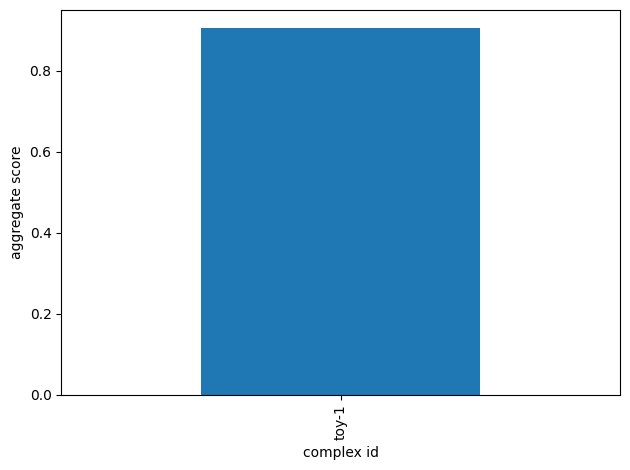

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('runs/summary.csv')
display(df)
ax = df.plot(kind='bar', x='id', y='aggregate_score', legend=False)
ax.set_xlabel('complex id'); ax.set_ylabel('aggregate score')
plt.tight_layout(); plt.show()
